The main aim of this notebook is to classify fake news and real news and see the confusion matrix.

In [24]:
import pandas as pd
print("Import `fake_or_real_news.csv`")
df = pd.read_csv('fake_or_real_news.csv')

Import `fake_or_real_news.csv`


In [25]:
y = df[['label']]
print(y.head())

  label
0  FAKE
1  FAKE
2  REAL
3  FAKE
4  REAL


In [26]:
df.drop('label', axis=1, inplace=True)
df.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)

tfidf_test = tfidf_vectorizer.transform(X_test)

In [29]:
print(tfidf_train.shape)
print(tfidf_test.shape)

(4244, 56922)
(2091, 56922)


In [30]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vectorizer = CountVectorizer(stop_words='english')

# count_train = count_vectorizer.fit_transform(X_train)

# count_test = count_vectorizer.transform(X_test)

In [31]:
print(tfidf_vectorizer.get_feature_names()[-10:])

# print(count_vectorizer.get_feature_names()[:10])


['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


(4244, 56922)
(2091, 56922)
accuracy:   0.857
Confusion matrix, without normalization


/home/joydeep/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


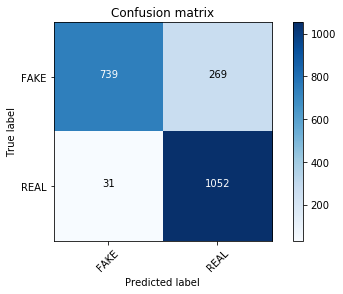

In [35]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import itertools
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


print(tfidf_train.shape)
print(tfidf_test.shape)

clf = MultinomialNB() 

clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])